In [14]:
import pandas as pd
import matplotlib.pyplot as plt
Dataset1 = pd.read_csv("/Users/joshuahernandez/Documents/GitHub/HeliosProjectDS/Solar_flare_RHESSI_2004_05.csv")
Dataset2 = pd.read_csv("/Users/joshuahernandez/Documents/GitHub/HeliosProjectDS/Solar_flare_RHESSI_2015_16.csv")

#now we are going to merge the 05-06 dataset with the 15-16 data set
Allyears = pd.concat([Dataset1, Dataset2], ignore_index=True)


display(Allyears)

,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.4,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f
0,196,592,644352.0,6-12,-966,-207,988,536,A0,DR,...,P1,Q2,2004-01-01 00:39:36,2004-01-01 00:40:06,2004-01-01 00:42:52,2004,1,1,6,12
1,588,592,1838208.0,6-12,-967,-200,987,536,A0,DR,...,Q1,NaN,2004-01-01 00:42:52,2004-01-01 00:43:34,2004-01-01 00:52:40,2004,1,1,6,12
2,712,1456,2815104.0,12-25,964,172,979,528,A0,P1,...,NaN,NaN,2004-01-01 01:06:56,2004-01-01 01:14:26,2004-01-01 01:18:48,2004,1,1,12,25
3,1096,3824,12128496.0,12-25,-972,-137,982,0,A0,DR,...,PE,Q2,2004-01-01 01:18:48,2004-01-01 01:29:22,2004-01-01 01:37:04,2004,1,1,12,25
4,452,200,476352.0,6-12,-978,-249,1009,536,A0,DR,...,P1,PE Q3,2004-01-01 02:21:20,2004-01-01 02:21:34,2004-01-01 02:28:52,2004,1,1,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28280,204,24,8096.0,6-12,-336,260,425,0,A0,DR,...,P1,PE Q3,2016-12-13 15:40:12,2016-12-13 15:41:14,2016-12-13 15:43:36,2016,12,13,6,12
28281,716,136,76016.0,12-25,929,307,979,2617,A0,DR,...,PE,Q2,2016-12-15 03:26:36,2016-12-15 03:30:06,2016-12-15 03:38:32,2016,12,15,12,25
28282,8,24,368.0,6-12,914,-84,918,0,A0,DF,...,PE,Q2,2016-12-21 16:16:40,2016-12-21 16:16:42,2016-12-21 16:16:48,2016,12,21,6,12
28283,520,24,17336.0,6-12,326,326,461,0,A0,DF,...,P1,PE Q3,2016-12-27 12:21:24,2016-12-27 12:21:30,2016-12-27 12:30:04,2016,12,27,6,12


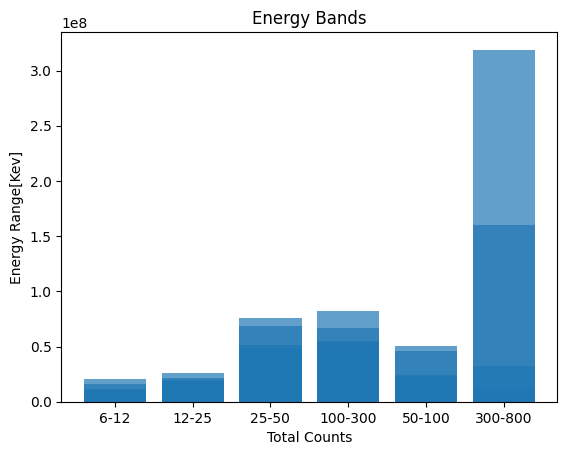

In [19]:
#THIS IS A PLOT SHOWING ENERGY BANDS FROM THE OVERALL DATA
plt.bar(Allyears['energy.kev'],Allyears['total.counts'], alpha=0.7)
plt.title('Energy Bands')
plt.xlabel('Total Counts')
plt.ylabel('Energy Range[Kev]')
plt.show()


In [34]:
#Average energy released per year
#THIS IS THE HISTOGRAM FOR MONTHS 21-24 BASED ON TOTAL.COUNT(x-axis)
x= Allyears['x.pos.asec']
y= Allyears['total.counts']

Allyears['result'] = Allyears.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)
# hist = plt.hist(x, bins=90, weights=y, density=True)

# Create a DataFrame (you should have your DataFrame loaded)
data = Allyears['energy.kev']
df = pd.DataFrame(data)

# Parse the values from the 'column_name' using a hyphen as a separator
df[['start', 'end']] = Allyears['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numeric
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
Allyears['median'] = df[['start', 'end']].median(axis=1)
# display(currentbranch)

Allyears['result'] = Allyears["median"]*Allyears["duration.s"]
# display(lastbatch)

#now we are going to average the medians to get our result

AverageKev = Allyears['result'].mean()

print("Average energy (kev) outputted for all years: " + str(AverageKev))


Average energy (kev) outputted for all years: 8311.189393671557


In [30]:
import pandas as pd

# Assuming Dataset1 is your DataFrame
x = Dataset1['x.pos.asec']
y = Dataset1['total.counts']

Dataset1['result'] = Dataset1.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)

# Create a DataFrame (you should have your DataFrame loaded)
data = Dataset1['energy.kev']
df = pd.DataFrame(data)

# Parse the values from the 'column_name' using a hyphen as a separator
df[['start', 'end']] = Dataset1['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numeric
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
Dataset1['median'] = df[['start', 'end']].median(axis=1)

Dataset1['result'] = Dataset1["median"] * Dataset1["duration.s"]

# Calculate the average of the 'result' column to get the average energy released
AverageKev = Dataset1['result'].mean()

print("Average energy (kev) outputted for 2005-2006 " + str(AverageKev))


Average energy (kev) outputted for 2005-2006 7418.507026162459


In [33]:
import pandas as pd

# Assuming Dataset2 is your DataFrame
x = Dataset2['x.pos.asec']
y = Dataset2['total.counts']

Dataset2['result'] = Dataset2.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)

# Create a DataFrame (you should have your DataFrame loaded)
data = Dataset2['energy.kev']
df = pd.DataFrame(data)

# Parse the values from the 'column_name' using a hyphen as a separator
df[['start', 'end']] = Dataset2['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numeric
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
Dataset2['median'] = df[['start', 'end']].median(axis=1)

Dataset2['result'] = Dataset2["median"] * Dataset2["duration.s"]

# Calculate the average of the 'result' column to get the average energy released
AverageKev = Dataset2['result'].mean()

print("Average energy (kev) outputted for 2015-2016: " + str(AverageKev))


Average energy (kev) outputted for 2015-2016: 9760.980424900268
